# wQLの挙動を可視化

https://docs.aws.amazon.com/forecast/latest/dg/metrics.html

In [11]:
import numpy as np
import pandas as pd

# numpyの操作
https://www.headboost.jp/how-to-create-an-array/

In [18]:
np.full(2, 3)

array([3, 3])

In [34]:
i=10
df = pd.DataFrame({'y' : np.full(i, 5),
                   'q10' : np.full(i, 1),
                   'q50' : np.full(i, 4),
                   'q90' : np.full(i, 9)
                  })

In [35]:
df

,y,q10,q50,q90
0,5,1,4,9
1,5,1,4,9
2,5,1,4,9
3,5,1,4,9
4,5,1,4,9
5,5,1,4,9
6,5,1,4,9
7,5,1,4,9
8,5,1,4,9
9,5,1,4,9


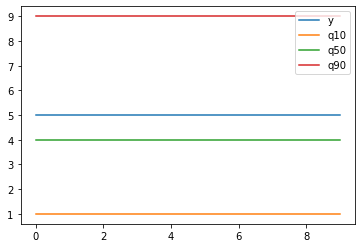

In [36]:
df.plot()

# wQLの計算
https://docs.aws.amazon.com/forecast/latest/dg/metrics.html

In [49]:
def wql(y, q, tau):
    for i in range(len(y)):
        #print(i)
        #print(y[i])
        sum_upper = tau * max(y[i]-q[i],0) + (1-tau) * max(q[i]-y[i],0)
        sum_lower = y[i]
    return 2 * sum_upper / sum_lower

In [51]:
print(wql(df['y'], df['q10'], 0.1))
print(wql(df['y'], df['q50'], 0.5))
print(wql(df['y'], df['q90'], 0.9))

0.16
0.2
0.15999999999999998


## yが予測値より上の場合

In [71]:
def display_wql(y_value):
    i=10
    df = pd.DataFrame({'y' : np.full(i, y_value),
                       'q10' : np.full(i, 1),
                       'q50' : np.full(i, 4),
                       'q90' : np.full(i, 9)
                      })
    print(f"wQL[0.9] : {wql(df['y'], df['q90'], 0.9)}")
    print(f"wQL[0.5] : {wql(df['y'], df['q50'], 0.5)}")
    print(f"wQL[0.1] : {wql(df['y'], df['q10'], 0.1)}")
    df.plot(figsize=(3,3))
    return

wQL[0.9] : 0.18
wQL[0.5] : 0.6
wQL[0.1] : 0.18


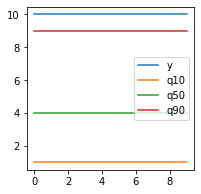

In [75]:
display_wql(10)

wQL[0.9] : 0.0
wQL[0.5] : 0.5555555555555556
wQL[0.1] : 0.17777777777777778


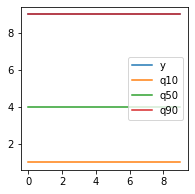

In [83]:
display_wql(9)

wQL[0.9] : 0.024999999999999994
wQL[0.5] : 0.5
wQL[0.1] : 0.17500000000000002


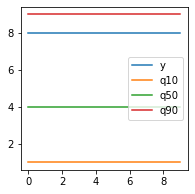

In [84]:
display_wql(8)

wQL[0.9] : 0.05714285714285713
wQL[0.5] : 0.42857142857142855
wQL[0.1] : 0.17142857142857146


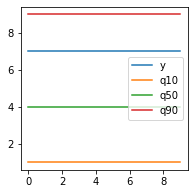

In [85]:
display_wql(7)

wQL[0.9] : 0.09999999999999998
wQL[0.5] : 0.3333333333333333
wQL[0.1] : 0.16666666666666666


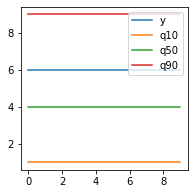

In [86]:
display_wql(6)

wQL[0.9] : 0.15999999999999998
wQL[0.5] : 0.2
wQL[0.1] : 0.16


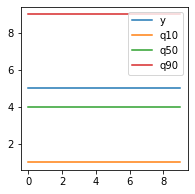

In [87]:
display_wql(5)

wQL[0.9] : 0.24999999999999994
wQL[0.5] : 0.0
wQL[0.1] : 0.15000000000000002


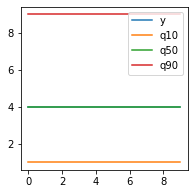

In [88]:
display_wql(4)

wQL[0.9] : 0.3999999999999999
wQL[0.5] : 0.3333333333333333
wQL[0.1] : 0.13333333333333333


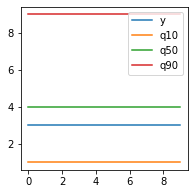

In [89]:
display_wql(3)

wQL[0.9] : 0.6999999999999998
wQL[0.5] : 1.0
wQL[0.1] : 0.1


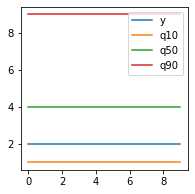

In [90]:
display_wql(2)

wQL[0.9] : 1.5999999999999996
wQL[0.5] : 3.0
wQL[0.1] : 0.0


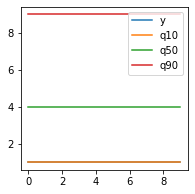

In [91]:
display_wql(1)

## q90とq50の間

wQL[0.9] : 0.05714285714285713
wQL[0.5] : 0.42857142857142855
wQL[0.1] : 0.17142857142857146


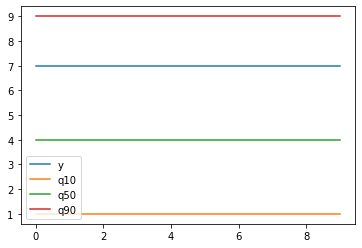

In [60]:
i=10
df = pd.DataFrame({'y' : np.full(i, 7),
                   'q10' : np.full(i, 1),
                   'q50' : np.full(i, 4),
                   'q90' : np.full(i, 9)
                  })
print(f"wQL[0.9] : {wql(df['y'], df['q90'], 0.9)}")
print(f"wQL[0.5] : {wql(df['y'], df['q50'], 0.5)}")
print(f"wQL[0.1] : {wql(df['y'], df['q10'], 0.1)}")
df.plot()

wQL[0.9] : 0.15999999999999998
wQL[0.5] : 0.2
wQL[0.1] : 0.16


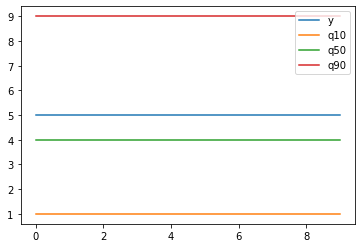

In [61]:
i=10
df = pd.DataFrame({'y' : np.full(i, 5),
                   'q10' : np.full(i, 1),
                   'q50' : np.full(i, 4),
                   'q90' : np.full(i, 9)
                  })
print(f"wQL[0.9] : {wql(df['y'], df['q90'], 0.9)}")
print(f"wQL[0.5] : {wql(df['y'], df['q50'], 0.5)}")
print(f"wQL[0.1] : {wql(df['y'], df['q10'], 0.1)}")
df.plot()

wQL[0.9] : 0.24999999999999994
wQL[0.5] : 0.0
wQL[0.1] : 0.15000000000000002


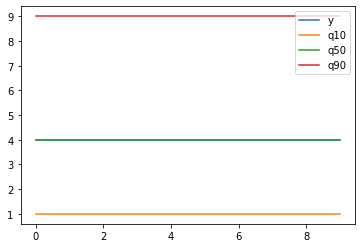

In [62]:
i=10
df = pd.DataFrame({'y' : np.full(i, 4),
                   'q10' : np.full(i, 1),
                   'q50' : np.full(i, 4),
                   'q90' : np.full(i, 9)
                  })
print(f"wQL[0.9] : {wql(df['y'], df['q90'], 0.9)}")
print(f"wQL[0.5] : {wql(df['y'], df['q50'], 0.5)}")
print(f"wQL[0.1] : {wql(df['y'], df['q10'], 0.1)}")
df.plot()

In [ ]:
i=10
df = pd.DataFrame({'y' : np.full(i, 4),
                   'q10' : np.full(i, 1),
                   'q50' : np.full(i, 4),
                   'q90' : np.full(i, 9)
                  })
print(f"wQL[0.9] : {wql(df['y'], df['q90'], 0.9)}")
print(f"wQL[0.5] : {wql(df['y'], df['q50'], 0.5)}")
print(f"wQL[0.1] : {wql(df['y'], df['q10'], 0.1)}")
df.plot()